<a href="https://colab.research.google.com/github/Vaibhav-S75/Team_404_Object_Detection/blob/main/PROJECT_PHASE_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install pycocotools
!pip install opencv-python-headless
!pip install matplotlib


In [ ]:
import os

# Define directories to store the COCO dataset
images_dir = '/content/coco/images'
annotations_dir = '/content/coco/annotations'

# Create directories if they don't exist
os.makedirs(images_dir, exist_ok=True)
os.makedirs(annotations_dir, exist_ok=True)

# Download COCO 2017 Train images (118k images) ~19GB
!wget -q --show-progress http://images.cocodataset.org/zips/train2017.zip -P {images_dir}

# Download COCO 2017 Annotations ~241MB
!wget -q --show-progress http://images.cocodataset.org/annotations/annotations_trainval2017.zip -P {annotations_dir}

# Unzip the downloaded files
!unzip -q {images_dir}/train2017.zip -d {images_dir}
!unzip -q {annotations_dir}/annotations_trainval2017.zip -d {annotations_dir}


train2017.zip.1     100%[===================>]  18.01G  12.5MB/s    in 4m 44s  
annotations_trainva 100%[===================>] 241.19M  61.4MB/s    in 4.2s    
replace /content/coco/images/train2017/000000147328.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace /content/coco/annotations/annotations/instances_train2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
# Define the path to the annotation file
annotations_file = '/content/coco/annotations/annotations/instances_train2017.json'

# Check if the annotation file exists
if os.path.exists(annotations_file):
    print("Annotation file found!")
else:
    print("Annotation file not found. Please check the path.")


Annotation file found!


loading annotations into memory...
Done (t=20.25s)
creating index...
index created!


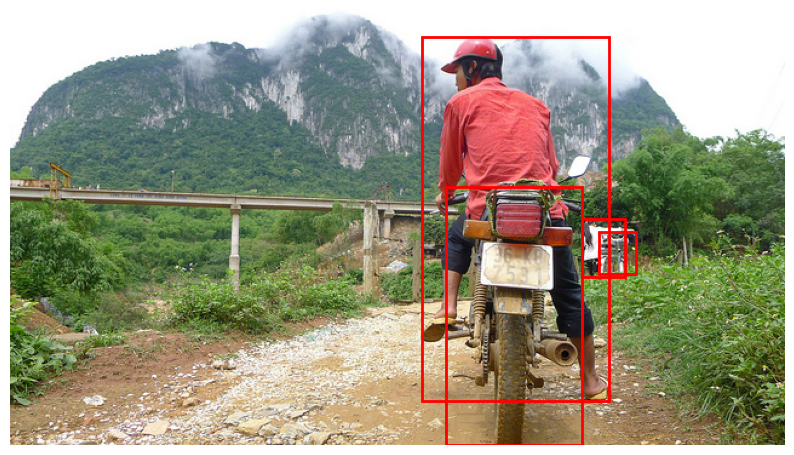

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pycocotools.coco import COCO

# Initialize the COCO API for instance annotations
coco = COCO(annotations_file)

# Get all image IDs
img_ids = coco.getImgIds()

# Load a random image
img_id = img_ids[0]
img_info = coco.loadImgs(img_id)[0]

# Load the image using OpenCV
image_path = os.path.join(images_dir, 'train2017', img_info['file_name'])
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get annotations for the image
ann_ids = coco.getAnnIds(imgIds=img_info['id'])
annotations = coco.loadAnns(ann_ids)

# Display the image and draw the bounding boxes
plt.figure(figsize=(10, 8))
plt.imshow(image)

for ann in annotations:
    bbox = ann['bbox']
    x, y, w, h = bbox
    rect = plt.Rectangle((x, y), w, h, fill=False, color='red', linewidth=2)
    plt.gca().add_patch(rect)

plt.axis('off')
plt.show()


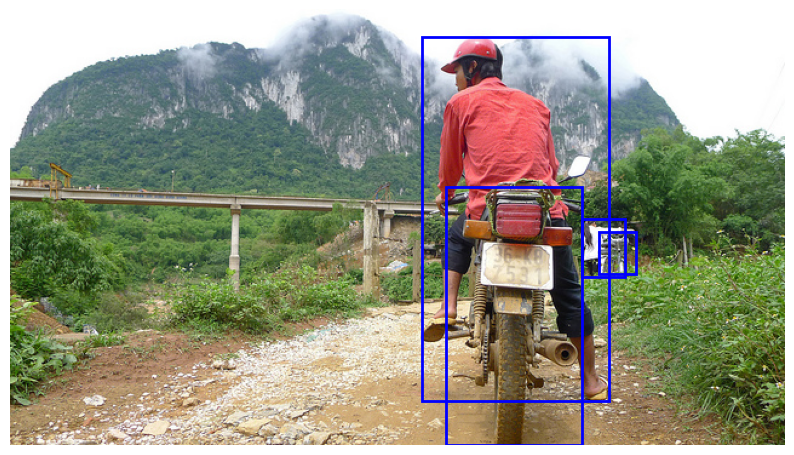

In [5]:
def clean_annotations(annotations):
    clean_anns = []
    for ann in annotations:
        x, y, w, h = ann['bbox']
        # Filter out annotations with non-positive width or height
        if w > 0 and h > 0:
            clean_anns.append(ann)
    return clean_anns

# Clean annotations
cleaned_annotations = clean_annotations(annotations)

# Display the cleaned image with annotations
plt.figure(figsize=(10, 8))
plt.imshow(image)

for ann in cleaned_annotations:
    bbox = ann['bbox']
    x, y, w, h = bbox
    rect = plt.Rectangle((x, y), w, h, fill=False, color='blue', linewidth=2)
    plt.gca().add_patch(rect)

plt.axis('off')
plt.show()


Dataset statistics: {'person': 262465, 'bicycle': 7113, 'car': 43867, 'motorcycle': 8725, 'airplane': 5135, 'bus': 6069, 'train': 4571, 'truck': 9973, 'boat': 10759, 'traffic light': 12884, 'fire hydrant': 1865, 'stop sign': 1983, 'parking meter': 1285, 'bench': 9838, 'bird': 10806, 'cat': 4768, 'dog': 5508, 'horse': 6587, 'sheep': 9509, 'cow': 8147, 'elephant': 5513, 'bear': 1294, 'zebra': 5303, 'giraffe': 5131, 'backpack': 8720, 'umbrella': 11431, 'handbag': 12354, 'tie': 6496, 'suitcase': 6192, 'frisbee': 2682, 'skis': 6646, 'snowboard': 2685, 'sports ball': 6347, 'kite': 9076, 'baseball bat': 3276, 'baseball glove': 3747, 'skateboard': 5543, 'surfboard': 6126, 'tennis racket': 4812, 'bottle': 24342, 'wine glass': 7913, 'cup': 20650, 'fork': 5479, 'knife': 7770, 'spoon': 6165, 'bowl': 14358, 'banana': 9458, 'apple': 5851, 'sandwich': 4373, 'orange': 6399, 'broccoli': 7308, 'carrot': 7852, 'hot dog': 2918, 'pizza': 5821, 'donut': 7179, 'cake': 6353, 'chair': 38491, 'couch': 5779, 'po

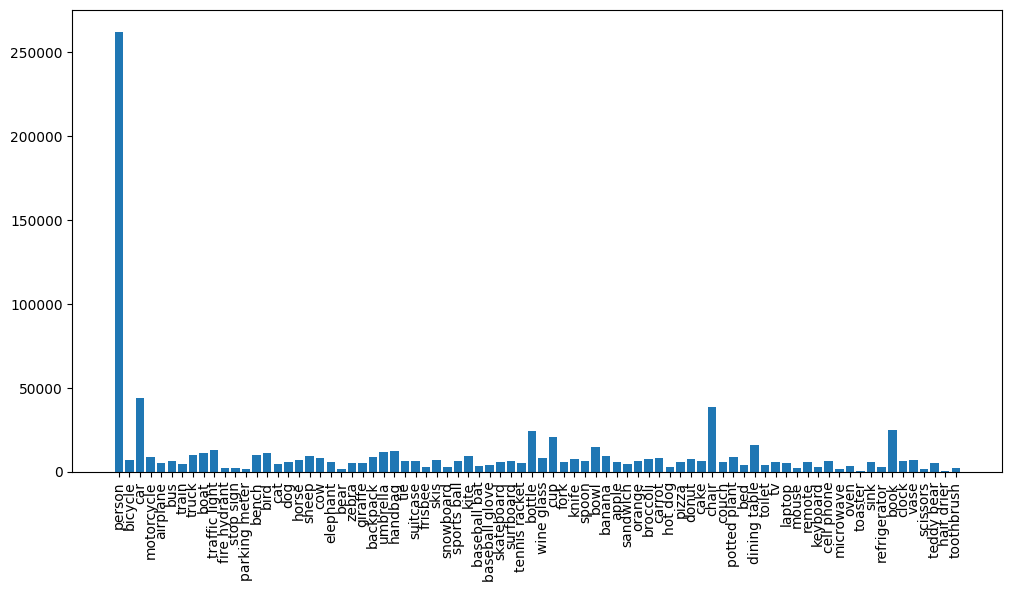

In [6]:
def dataset_statistics(coco, cat_ids):
    stats = {}
    for cat_id in cat_ids:
        cat_name = coco.loadCats(cat_id)[0]['name']
        ann_ids = coco.getAnnIds(catIds=[cat_id])
        anns = coco.loadAnns(ann_ids)
        stats[cat_name] = len(anns)
    return stats

cat_ids = coco.getCatIds()
stats = dataset_statistics(coco, cat_ids)

# Display dataset statistics
print("Dataset statistics:", stats)

plt.figure(figsize=(12, 6))
plt.bar(stats.keys(), stats.values())
plt.xticks(rotation=90)
plt.show()
